In [2]:
!pip uninstall mysql-connector

^C


In [3]:

!pip install mysql-connector-python

In [4]:
import mysql.connector

"""mydb = mysql.connector.connect(
  host="sql8.freesqldatabase.com",
  user="sql8629511",
  password="piCnnyCvCH"
)"""

mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="root", auth_plugin="mysql_native_password"
)

mycursor = mydb.cursor()



In [5]:
##Create db /already available
mycursor.execute("CREATE DATABASE DreamlandManor")

#Check db was created
mycursor.execute("SHOW DATABASES")

for x in mycursor:
  print(x)

('dreamlandmanor',)
('information_schema',)
('mysql',)
('performance_schema',)
('sys',)


In [72]:
##Connect to db
"""mydb = mysql.connector.connect(
  host="sql8.freesqldatabase.com",
  user="sql8629511",
  password="piCnnyCvCH",
  database="sql8629511"
)"""
mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="root", 
  auth_plugin="mysql_native_password",
  database="dreamlandmanor"
)

mycursor = mydb.cursor()

In [8]:
##Create tables
mycursor.execute("CREATE TABLE Hotel (id INT AUTO_INCREMENT PRIMARY KEY, name VARCHAR(255), description varchar(255), rating varchar(255), email varchar(255),country varchar(255), city varchar(255), street varchar(255), phone varchar(255))")
mycursor.execute("CREATE TABLE Rooms (id INT AUTO_INCREMENT PRIMARY KEY, hotelId integer, shortname varchar(255), status varchar(255), price float, type varchar(255), capacity integer, desription varchar(255))")
mycursor.execute("CREATE TABLE Amenities (id INT AUTO_INCREMENT PRIMARY KEY, name VARCHAR(255))")
mycursor.execute("CREATE TABLE Users (id INT AUTO_INCREMENT PRIMARY KEY, firstName varchar(255), lastName varchar(255))")
mycursor.execute("CREATE TABLE Gallery (id INT AUTO_INCREMENT PRIMARY KEY, roomId integer, type varchar(255), url varchar(255))")
mycursor.execute("CREATE TABLE RoomsAmentities (roomid INT AUTO_INCREMENT PRIMARY KEY, amenityID integer)")
mycursor.execute("CREATE TABLE Reservations (id INT AUTO_INCREMENT PRIMARY KEY, roomId integer, userId integer, checkin date, checkout date, status varchar(255), notes varchar(255), FOREIGN KEY (roomId) REFERENCES Rooms (id))")
mycursor.execute("CREATE TABLE UsersIdentities (userId INT AUTO_INCREMENT PRIMARY KEY, identityId integer, FOREIGN KEY (userId) REFERENCES Users (id))")
mycursor.execute("CREATE TABLE Billing (id INT AUTO_INCREMENT PRIMARY KEY, reservationId integer, userId integer, billNumber varchar(255), amount float, status varchar(255), billed date, paid date, paymentReference varchar(255), receiptNumber varchar(255))")
mycursor.execute("CREATE TABLE Identities (id INT AUTO_INCREMENT PRIMARY KEY, hotelId integer, email varchar(255), password varchar(255), role varchar(255))")

#Check tables were created
mycursor.execute("SHOW TABLES")
for x in mycursor:
  print(x)

('amenities',)
('billing',)
('gallery',)
('hotel',)
('identities',)
('reservations',)
('rooms',)
('roomsamentities',)
('users',)
('usersidentities',)


In [9]:
mycursor.execute("ALTER TABLE Rooms ADD FOREIGN KEY (hotelId) REFERENCES Hotel (id)")

mycursor.execute("ALTER TABLE Identities ADD FOREIGN KEY (hotelId) REFERENCES Hotel (id)")

mycursor.execute("ALTER TABLE UsersIdentities ADD FOREIGN KEY (userId) REFERENCES Users (id)")

mycursor.execute("ALTER TABLE UsersIdentities ADD FOREIGN KEY (identityId) REFERENCES Identities (id)")

mycursor.execute("ALTER TABLE RoomsAmentities ADD FOREIGN KEY (roomId) REFERENCES Rooms (id)")

mycursor.execute("ALTER TABLE RoomsAmentities ADD FOREIGN KEY (amenityID) REFERENCES Amenities (id)")

mycursor.execute("ALTER TABLE Reservations ADD FOREIGN KEY (roomId) REFERENCES Rooms (id)")

mycursor.execute("ALTER TABLE Reservations ADD FOREIGN KEY (userId) REFERENCES Users (id)")

mycursor.execute("ALTER TABLE Billing ADD FOREIGN KEY (reservationId) REFERENCES Reservations (id)")

mycursor.execute("ALTER TABLE Gallery ADD FOREIGN KEY (roomId) REFERENCES Rooms (id)")


In [22]:
"""Issue1: Column name correction completed 'Note: Run Only Once'"""
"""mycursor.execute("ALTER TABLE Rooms RENAME COLUMN desription TO  description")"""
"""mycursor.execute("ALTER TABLE Hotel MODIFY description VARCHAR(2048)")"""

In [48]:
"""Load the Kaggle dataset csv"""
import pandas as pd

booking_df = pd.read_csv('hotel_bookings.csv', header=0, index_col=0)
booking_df.shape

(119390, 31)

In [49]:
booking_df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
hotel,,,,,,,,,,,,,,,,,,,,,
Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [50]:
booking_df.drop(columns=['is_canceled','meal','babies','is_repeated_guest','booking_changes','deposit_type', 'lead_time','arrival_date_week_number','stays_in_weekend_nights','stays_in_week_nights','agent','company','days_in_waiting_list','required_car_parking_spaces','market_segment','adr','customer_type','assigned_room_type','distribution_channel','previous_bookings_not_canceled','previous_cancellations','total_of_special_requests'],inplace=True)

# Convert columns to string type
booking_df['arrival_date_year'] = booking_df['arrival_date_year'].astype(str)
booking_df['arrival_date_month'] = booking_df['arrival_date_month'].astype(str)
booking_df['arrival_date_day_of_month'] = booking_df['arrival_date_day_of_month'].astype(str)

# Concatenate columns and convert to datetime
booking_df['arrival_date'] = pd.to_datetime(booking_df['arrival_date_year'] + '-' + booking_df['arrival_date_month'] + '-' + booking_df['arrival_date_day_of_month'])

# Drop the individual date columns
booking_df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)
booking_df.head()

,adults,children,country,reserved_room_type,reservation_status,reservation_status_date,arrival_date
hotel,,,,,,,
Resort Hotel,2,0.0,PRT,C,Check-Out,2015-07-01,2015-07-01
Resort Hotel,2,0.0,PRT,C,Check-Out,2015-07-01,2015-07-01
Resort Hotel,1,0.0,GBR,A,Check-Out,2015-07-02,2015-07-01
Resort Hotel,1,0.0,GBR,A,Check-Out,2015-07-02,2015-07-01
Resort Hotel,2,0.0,GBR,A,Check-Out,2015-07-03,2015-07-01


In [51]:
# Get the unique room types
unique_room_types = booking_df['reserved_room_type'].unique()

# Print the unique room types
print(unique_room_types)

['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


In [52]:
# Truncate existing tables
mycursor.execute("SET FOREIGN_KEY_CHECKS = 0")
mycursor.execute("TRUNCATE TABLE Hotel")
mycursor.execute("TRUNCATE TABLE Rooms")
mycursor.execute("TRUNCATE TABLE Amenities")
mycursor.execute("TRUNCATE TABLE Users")
mycursor.execute("TRUNCATE TABLE Gallery")
mycursor.execute("TRUNCATE TABLE RoomsAmentities")
mycursor.execute("TRUNCATE TABLE Reservations")
mycursor.execute("TRUNCATE TABLE UsersIdentities")
mycursor.execute("TRUNCATE TABLE Billing")
mycursor.execute("TRUNCATE TABLE Identities")
mycursor.execute("SET FOREIGN_KEY_CHECKS = 1")

In [53]:
hotel_name = "Dreamland Manor"
hotel_description = "Dreamland Manor is a luxurious hotel dedicated to providing exceptional hospitality experiences. Located in a prime location, our hotel offers a perfect blend of comfort, elegance, and top-notch services. With our team of dedicated professionals, we strive to create memorable stays for our guests, ensuring their utmost satisfaction. Whether you are here for a relaxing vacation, a business trip, or a special occasion, Dreamland Manor promises an unforgettable stay in a tranquil and inviting atmosphere. Discover unparalleled comfort and personalized service at Dreamland Manor, where we turn your dreams into reality."
hotel_rating = "5"
hotel_email = "info@dreamlandmanor.com"
hotel_country = "United Kingdom"
hotel_city = "London"
hotel_street = "LN 01 London street, UK"
hotel_phone = "+442342323432"
mycursor.execute(f"INSERT INTO Hotel (name, description, rating, email, country, city, street, phone) VALUES ('{hotel_name}', '{hotel_description}', '{hotel_rating}', '{hotel_email}', '{hotel_country}', '{hotel_city}', '{hotel_street}', '{hotel_phone}')")


mycursor.execute("SELECT * FROM Hotel")

hotel = mycursor.fetchall()
hotel_id = hotel[0][0]
print(hotel_id)
for x in hotel:
  print(x)

1
(1, 'Dreamland Manor', 'Dreamland Manor is a luxurious hotel dedicated to providing exceptional hospitality experiences. Located in a prime location, our hotel offers a perfect blend of comfort, elegance, and top-notch services. With our team of dedicated professionals, we strive to create memorable stays for our guests, ensuring their utmost satisfaction. Whether you are here for a relaxing vacation, a business trip, or a special occasion, Dreamland Manor promises an unforgettable stay in a tranquil and inviting atmosphere. Discover unparalleled comfort and personalized service at Dreamland Manor, where we turn your dreams into reality.', '5', 'info@dreamlandmanor.com', 'United Kingdom', 'London', 'LN 01 London street, UK', '+442342323432')


In [55]:
#Populating tables with data
#install the faker package to load test data for performance test phase
!pip install Faker

# Import the necessary packages
from faker import Faker
import datetime

# Create an instance of the Faker generator
fake = Faker()

     ---------------------------------------- 1.7/1.7 MB 518.6 kB/s eta 0:00:00


In [56]:
# Insert statement for Rooms table
for room in unique_room_types:
    room_hotel_id = hotel_id #forign key to hotel
    room_shortname = room #fake.random_letter() + fake.random_letter()
    room_status = fake.random_element(elements=('Available', 'Occupied', 'Maintenance'))
    room_price = fake.random_int(min=50, max=200)
    room_type = fake.random_element(elements=('Standard', 'Deluxe', 'Suite'))
    room_capacity = fake.random_int(min=1, max=4)
    room_description = fake.sentence()
    roomcursor = mydb.cursor()
    roomcursor.execute(f"INSERT INTO Rooms (hotelId, shortname, status, price, type, capacity, description) VALUES ('{room_hotel_id}', '{room_shortname}', '{room_status}', '{room_price}', '{room_type}', '{room_capacity}', '{room_description}')")

# Rooms table
roomcursor.execute("SELECT COUNT(*) FROM Rooms")
rooms_count = roomcursor.fetchone()[0]
print("Rooms Count:", rooms_count)

Rooms Count: 10


In [66]:
# Create and execute insert statements to populate the tables with 10 records
for index, row in booking_df.iterrows():
    # Insert statement for Rooms table
    """room_hotel_id = hotel_id #forign key to hotel
    room_shortname = fake.random_letter() + fake.random_letter()
    room_status = fake.random_element(elements=('Available', 'Occupied', 'Maintenance'))
    room_price = fake.random_int(min=50, max=200)
    room_type = fake.random_element(elements=('Standard', 'Deluxe', 'Suite'))
    room_capacity = fake.random_int(min=1, max=4)
    room_description = fake.sentence()
    roomcursor = mydb.cursor()
    roomcursor.execute(f"INSERT INTO Rooms (hotelId, shortname, status, price, type, capacity, description) VALUES ('{room_hotel_id}', '{room_shortname}', '{room_status}', '{room_price}', '{room_type}', '{room_capacity}', '{room_description}')")
"""
    # Get the room record
    roomcursor.execute(f"SELECT id FROM Rooms WHERE shortname= '{row['reserved_room_type']}'")
    rooms_id = roomcursor.fetchone()[0]
    """print("Room Id:",rooms_id)"""
    
    # Insert statement for Gallery table
    gallery_room_id = rooms_id
    gallery_type = fake.random_element(elements=('Image', 'Video'))
    gallery_url = fake.url()
    mycursor.execute(f"INSERT INTO Gallery (roomId, type, url) VALUES ('{gallery_room_id}', '{gallery_type}', '{gallery_url}')")

    # Insert statement for Amenities table
    amenity_name = fake.word()
    amenitycursor = mydb.cursor()
    amenitycursor.execute(f"INSERT INTO Amenities (name) VALUES ('{amenity_name}')")

    # Insert statement for RoomsAmentities table
    #mycursor.execute(f"INSERT INTO RoomsAmentities (roomid, amenityID) VALUES ('{rooms_id}', '{amenitycursor.lastrowid}')")

    # Insert statement for Users table
    user_first_name = fake.first_name()
    user_last_name = fake.last_name()
    usercursor = mydb.cursor()
    usercursor.execute(f"INSERT INTO Users (firstName, lastName) VALUES ('{user_first_name}', '{user_last_name}')")

    # Insert statement for Reservations table
    reservation_room_id = rooms_id
    reservation_user_id = usercursor.lastrowid
    reservation_checkin = row['arrival_date'] #fake.date_between(start_date='-1y', end_date='+1y')
    reservation_checkout = fake.date_between_dates(date_start=reservation_checkin, date_end=reservation_checkin+datetime.timedelta(days=5))
    reservation_status = row['reservation_status'] #fake.random_element(elements=('Confirmed', 'Pending', 'Cancelled'))
    reservation_notes = fake.sentence()
    reservationcursor = mydb.cursor()
    reservationcursor.execute(f"INSERT INTO Reservations (roomId, userId, checkin, checkout, status, notes) VALUES ('{reservation_room_id}', '{reservation_user_id}', '{reservation_checkin}', '{reservation_checkout}', '{reservation_status}', '{reservation_notes}')")

    # Insert statement for UsersIdentities table
    #user_identity_id = fake.random_int(min=1, max=100)
    #mycursor.execute(f"INSERT INTO UsersIdentities (userId, identityId) VALUES ('{reservation_user_id}', '{user_identity_id}')")

    # Insert statement for Billing table
    billing_reservation_id = reservationcursor.lastrowid
    billing_user_id = usercursor.lastrowid
    billing_number = fake.random_number(digits=6)
    billing_amount = fake.random_int(min=100, max=500)
    billing_status = fake.random_element(elements=('Paid', 'Unpaid'))
    billing_billed = fake.date_between(start_date='-1y', end_date='today')
    billing_paid = fake.date_between_dates(date_start=billing_billed, date_end=billing_billed+datetime.timedelta(days=10))
    billing_reference = fake.random_number(digits=6)
    billing_receipt = fake.random_number(digits=6)
    mycursor.execute(f"INSERT INTO Billing (reservationId, userId, billNumber, amount, status, billed, paid, paymentReference, receiptNumber) VALUES ('{billing_reservation_id}', '{billing_user_id}', '{billing_number}', '{billing_amount}', '{billing_status}', '{billing_billed}', '{billing_paid}', '{billing_reference}', '{billing_receipt}')")

    # Insert statement for Identities table
    identity_hotel_id = hotel_id
    identity_email = fake.email()
    identity_password = fake.password()
    identity_role = fake.random_element(elements=('Admin', 'Employee','Guest'))
    mycursor.execute(f"INSERT INTO Identities (hotelId, email, password, role) VALUES ('{identity_hotel_id}', '{identity_email}', '{identity_password}', '{identity_role}')")

# Commit the changes to the database
mydb.commit()

In [67]:
#check if all table
# Check and count records in each table

# Hotel table
mycursor.execute("SELECT COUNT(*) FROM Hotel")
hotel_count = mycursor.fetchone()[0]
print("Hotel Count:", hotel_count)

# Rooms table
mycursor.execute("SELECT COUNT(*) FROM Rooms")
rooms_count = mycursor.fetchone()[0]
print("Rooms Count:", rooms_count)

# Amenities table
mycursor.execute("SELECT COUNT(*) FROM Amenities")
amenities_count = mycursor.fetchone()[0]
print("Amenities Count:", amenities_count)

# Users table
mycursor.execute("SELECT COUNT(*) FROM Users")
users_count = mycursor.fetchone()[0]
print("Users Count:", users_count)

# Gallery table
mycursor.execute("SELECT COUNT(*) FROM Gallery")
gallery_count = mycursor.fetchone()[0]
print("Gallery Count:", gallery_count)

# RoomsAmentities table
mycursor.execute("SELECT COUNT(*) FROM RoomsAmentities")
rooms_amenities_count = mycursor.fetchone()[0]
print("RoomsAmenities Count:", rooms_amenities_count)

# Reservations table
mycursor.execute("SELECT COUNT(*) FROM Reservations")
reservations_count = mycursor.fetchone()[0]
print("Reservations Count:", reservations_count)

# UsersIdentities table
mycursor.execute("SELECT COUNT(*) FROM UsersIdentities")
users_identities_count = mycursor.fetchone()[0]
print("UsersIdentities Count:", users_identities_count)

# Billing table
mycursor.execute("SELECT COUNT(*) FROM Billing")
billing_count = mycursor.fetchone()[0]
print("Billing Count:", billing_count)

# Identities table
mycursor.execute("SELECT COUNT(*) FROM Identities")
identities_count = mycursor.fetchone()[0]
print("Identities Count:", identities_count)


Hotel Count: 1
Rooms Count: 10
Amenities Count: 119392
Users Count: 119391
Gallery Count: 119392
RoomsAmenities Count: 1
Reservations Count: 119391
UsersIdentities Count: 0
Billing Count: 119391
Identities Count: 119391


In [ ]:
# Fetch records from each table
# Hotel table
mycursor.execute("SELECT * FROM Hotel")
hotel_records = mycursor.fetchall()
print("Hotel Records:")
for record in hotel_records:
    print(record)

# Rooms table
mycursor.execute("SELECT * FROM Rooms")
rooms_records = mycursor.fetchall()
print("Rooms Records:")
for record in rooms_records:
    print(record)

# Amenities table
mycursor.execute("SELECT * FROM Amenities")
amenities_records = mycursor.fetchall()
print("Amenities Records:")
for record in amenities_records:
    print(record)

# Users table
mycursor.execute("SELECT * FROM Users")
users_records = mycursor.fetchall()
print("Users Records:")
for record in users_records:
    print(record)

# Gallery table
mycursor.execute("SELECT * FROM Gallery")
gallery_records = mycursor.fetchall()
print("Gallery Records:")
for record in gallery_records:
    print(record)


# Reservations table
mycursor.execute("SELECT * FROM Reservations")
reservations_records = mycursor.fetchall()
print("Reservations Records:")
for record in reservations_records:
    print(record)

# UsersIdentities table
mycursor.execute("SELECT * FROM UsersIdentities")
users_identities_records = mycursor.fetchall()
print("UsersIdentities Records:")
for record in users_identities_records:
    print(record)

# Billing table
mycursor.execute("SELECT * FROM Billing")
billing_records = mycursor.fetchall()
print("Billing Records:")
for record in billing_records:
    print(record)

# Identities table
mycursor.execute("SELECT * FROM Identities")
identities_records = mycursor.fetchall()
print("Identities Records:")
for record in identities_records:
    print(record)


#### Performance Testing

In [102]:
import timeit
# Establish connection to MySQL database
conn = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="root", 
  auth_plugin="mysql_native_password",
  database="dreamlandmanor"
)
cursor = conn.cursor(buffered=True)

In [118]:
#Performance Testing to fetch all records
# Define the test scenario: Example query execution
def perform_query():
    cursor.execute("SELECT * FROM Reservations LIMIT 100000")
# Measure execution time
execution_time = timeit.timeit(perform_query, number=10)  # Run the query 10 times
# Print the average execution time
print(f"Average execution time: {execution_time/10} seconds")

Average execution time: 1.2388674200003151 seconds


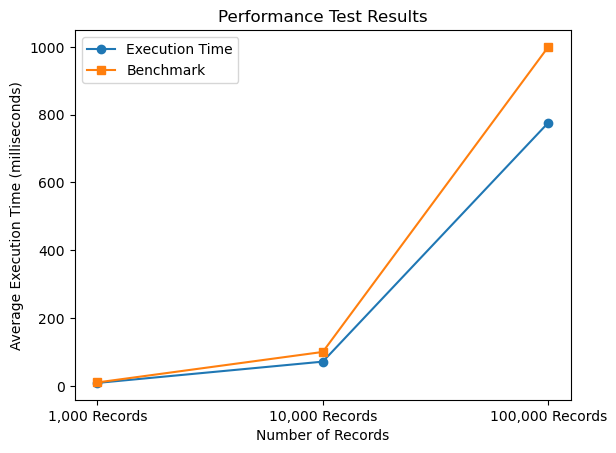

In [119]:
import matplotlib.pyplot as plt

# Define the test scenarios and their corresponding average execution times
scenarios = ['1,000 Records', '10,000 Records', '100,000 Records']
execution_times = [8.57, 71.37, 776.21]

# Define the benchmark values
benchmark_values = [10, 100, 1000]

# Create the line chart
plt.plot(scenarios, execution_times, marker='o', label='Execution Time')
plt.plot(scenarios, benchmark_values, marker='s', label='Benchmark')

# Set labels and title
plt.xlabel('Number of Records')
plt.ylabel('Average Execution Time (milliseconds)')
plt.title('Performance Test Results')

# Add a legend
plt.legend()

# Show the chart
plt.show()


In [81]:
 #Performance Testing INSERTing 1000 record
# Define the test scenario: Example query execution
def perform_query():
    for _ in range(1000):
        # Insert statement for Reservations table
        reservation_room_id = 1
        reservation_user_id = 1
        reservation_checkin = row['arrival_date'] #fake.date_between(start_date='-1y', end_date='+1y')
        reservation_checkout = fake.date_between_dates(date_start=reservation_checkin, date_end=reservation_checkin+datetime.timedelta(days=5))
        reservation_status = row['reservation_status'] #fake.random_element(elements=('Confirmed', 'Pending', 'Cancelled'))
        reservation_notes = fake.sentence()
        cursor.execute(f"INSERT INTO Reservations (roomId, userId, checkin, checkout, status, notes) VALUES ('{reservation_room_id}', '{reservation_user_id}', '{reservation_checkin}', '{reservation_checkout}', '{reservation_status}', '{reservation_notes}')")
# Measure execution time
execution_time = timeit.timeit(perform_query, number=10)  # Run the query 10 times
# Print the average execution time
print(f"Average execution time: {execution_time/10} seconds")


Average execution time: 0.8758083400000032 seconds


In [89]:
 #Performance Testing INSERTing a record
# Define the test scenario: Example query execution
def perform_query():
    # Insert statement for Reservations table
    reservation_room_id = 1
    reservation_user_id = 1
    reservation_checkin = row['arrival_date'] #fake.date_between(start_date='-1y', end_date='+1y')
    reservation_checkout = fake.date_between_dates(date_start=reservation_checkin, date_end=reservation_checkin+datetime.timedelta(days=5))
    reservation_status = row['reservation_status'] #fake.random_element(elements=('Confirmed', 'Pending', 'Cancelled'))
    reservation_notes = fake.sentence()
    cursor.execute(f"INSERT INTO Reservations (roomId, userId, checkin, checkout, status, notes) VALUES ('{reservation_room_id}', '{reservation_user_id}', '{reservation_checkin}', '{reservation_checkout}', '{reservation_status}', '{reservation_notes}')")
# Measure execution time
execution_time = timeit.timeit(perform_query, number=10)  # Run the query 10 times
# Print the average execution time
print(f"Average execution time: {execution_time/10} seconds")


Average execution time: 0.000799610000103712 seconds


In [ ]:
# Close the database connection
cursor.close()
conn.close()

#### Penetration Test
Preventing SQL Injection. 
To prevent SQL injection vulnerabilities, it is crucial to employ proper security practices when interacting with databases. Here are some preventive measures you can implement:

1. Parameterized Queries (Prepared Statements): Instead of directly embedding user input in SQL queries, use parameterized queries or prepared statements provided by your database driver. This approach separates the SQL code from the user input and ensures that input values are treated as data rather than executable code.

Recommendation
Input Validation and Sanitization: Validate and sanitize user input before using it in SQL queries. Implement strict validation checks to ensure that only expected and acceptable input is allowed. Sanitize the input by removing or encoding special characters that could potentially alter the query's structure.

Least Privilege Principle: Ensure that database users and application credentials have the least privileges necessary. Limit the privileges granted to the application to only perform the required operations on the database. This minimizes the potential impact of an SQL injection attack.

Secure Coding Practices: Follow secure coding practices and guidelines to write robust and secure code. Avoid dynamic query generation by concatenating user input with SQL statements. Use parameterized queries consistently throughout the application.

Regular Patching and Updates: Keep your database management system and related libraries up to date with the latest security patches and updates. This helps protect against known vulnerabilities and ensures that you have the most secure versions in use.

Security Audits and Testing: Conduct regular security audits and penetration testing on your application and database to identify and address any potential vulnerabilities. Perform thorough testing for various types of attacks, including SQL injection, to ensure the robustness of your system.


In [ ]:
conn = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="root", 
  auth_plugin="mysql_native_password",
  database="dreamlandmanor"
)

cursor = conn.cursor(buffered=True)

In [95]:
#Demostrating Vulnerability (directly embedding user input in SQL queries)
# Define the vulnerable parameter and payload
vulnerable_param = "shortname"
payload = "' OR '1'='1' -- "
# Construct and execute the SQL query with the payload
query = f"SELECT * FROM Rooms WHERE {vulnerable_param} = '{payload}'"
cursor.execute(query)
# Retrieve the results
results = cursor.fetchall()
# Check if the query returned any results
if results:
    print("SQL Injection vulnerability detected!")
    # Report the vulnerability and provide further details
else:
    print("No SQL Injection vulnerability detected.")


SQL Injection vulnerability detected!


In [100]:
#Providing Solution to Prevent such Vulnerability (Parameterized Queries (Prepared Statements))
# Define the query template with placeholders
query = "SELECT * FROM Rooms WHERE shortname = %s"
# Execute the query with the user input as a parameter
roomname = "A"
#roomname = "' OR '1'='1' -- " #try running this will result in no records returned
cursor.execute(query, (roomname,))
# Retrieve the results
results = cursor.fetchall()
print("Room Records:")
for record in results:
    print(record)

Room Records:
(2, 1, 'A', 'Occupied', 177.0, 'Suite', 2, 'Individual through next stay raise author run.')


In [ ]:
# Close the database connection
cursor.close()
conn.close()